In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import itertools
def plot_confusion_matrix(cm, target_names=None, cmap=None, normalize=True, labels=True, title='Confusion matrix'):
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    plt.figure(figsize=(5, 5))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)

    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    
    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names)
        plt.yticks(tick_marks, target_names)
    
    if labels:
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            if normalize:
                plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                         horizontalalignment="center",
                         color="white" if cm[i, j] > thresh else "black")
            else:
                plt.text(j, i, "{:,}".format(cm[i, j]),
                         horizontalalignment="center",
                         color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

In [3]:
df = pd.read_excel('/home/heemin/mv/dir/VideoStimSet_SuppTable1.xlsx', engine='openpyxl')
df.head()

/home/heemin/.pyenv/versions/3.6.8/envs/meta/lib/python3.6/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,video,mode,% correct,Actor,age,gender,disgust (N raters),embarrassment (N raters),fear (N raters),sadness (N raters),happiness (N raters),pride (N raters),neutral (N raters),none (N raters)
0,duckEE10d,sadness,0.611111,10,13,F,8.0,2.0,2.0,22.0,0.0,0.0,0.0,2.0
1,duckEE10e,embarrassment,0.583333,10,13,F,0.0,21.0,0.0,0.0,0.0,2.0,10.0,3.0
2,duckEE10f,fear,0.611111,10,13,F,3.0,4.0,22.0,0.0,0.0,0.0,3.0,4.0
3,duckEE10h,happiness,0.916667,10,13,F,0.0,0.0,0.0,1.0,33.0,0.0,2.0,0.0
4,duckEE10n,neutral,1.000000,10,13,F,0.0,0.0,0.0,0.0,0.0,0.0,36.0,0.0


In [4]:
df.columns

Index(['video', 'mode', '% correct', 'Actor', 'age', 'gender',
       'disgust (N raters)', 'embarrassment (N raters)', 'fear (N raters)',
       'sadness (N raters)', 'happiness (N raters)', 'pride (N raters)',
       'neutral (N raters)', 'none (N raters)'],
      dtype='object')

In [5]:
df = df[df['% correct']>=0.6]

## data crop

In [6]:
import os
import natsort

from collections import Counter

In [7]:
fl = os.listdir('/home/heemin/mv/dir/DuckEEs')

In [8]:
file_list = natsort.natsorted(fl)

In [9]:
drop_file =[]
for file in file_list:
    df1 = pd.read_csv('/home/heemin/mv/dir/DuckEEs/'+file)[['total_count', 'emotion']]
    if len(df1) == 0:
        drop_file.append(file)

In [10]:
drop_file

['31n.csv', '39p.csv', '39s.csv', '46e.csv', '46h.csv', '46n.csv', '46s.csv']

In [11]:
true_label = df[['video', 'mode']]
true_label['video'] = df['video'].str[6:]
drop_filename = []
for file in drop_file:
    drop_filename.append(file.split('.')[0])
drop_df = pd.DataFrame(drop_filename, columns=['video'])
drop_df['bad'] = 1

/home/heemin/.pyenv/versions/3.6.8/envs/meta/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [12]:
label1 = pd.merge(true_label, drop_df, how='left', on='video')
label2 = label1[label1['bad'].isnull()].iloc[:,0:-1]

In [13]:
label2

,video,mode
0,10d,sadness
1,10f,fear
2,10h,happiness
3,10n,neutral
4,10p,pride
...,...,...
173,44s,sadness
174,45h,happiness
175,45n,neutral
176,45p,pride


In [14]:
nega = ['disgust', 'fear', 'embarrassment', 'sadness']
happ = ['happiness', 'pride']

In [15]:
# label2['Neutral'] = 0
# label2.loc[label2['mode'] == 'neutral', 'Neutral'] = 1
# label2 = label2.reset_index()

In [16]:
label2['Neutral'] = 0
for emotion in nega:
    label2.loc[label2['mode'] == emotion, 'Neutral'] = 1
for emotion in happ:
    label2.loc[label2['mode'] == emotion, 'Neutral'] = 2
label2 = label2.reset_index()

In [17]:
label2

,index,video,mode,Neutral
0,0,10d,sadness,1
1,1,10f,fear,1
2,2,10h,happiness,2
3,3,10n,neutral,0
4,4,10p,pride,2
...,...,...,...,...
171,173,44s,sadness,1
172,174,45h,happiness,2
173,175,45n,neutral,0
174,176,45p,pride,2


In [18]:
label2 = label2[~label2['mode'].str.contains('pride', na = False)]
label2 = label2[~label2['mode'].str.contains('embar', na = False)]
label2 = label2.reset_index()

In [19]:
label2.to_excel('/home/heemin/mv/dir/DuckEEs_label.xlsx', index=False)

In [20]:
for idx in range(len(label2)):
    file = label2['video'][idx]
    df1 = pd.read_csv('/home/heemin/mv/dir/DuckEEs/'+file+'.csv')[['total_count', 'emotion']]
    end_frame = int(df1['total_count'][-1:])
    df2 = pd.merge(pd.DataFrame([i for i in range(1, end_frame+1)], columns=['total_count']), df1, how='outer').fillna('Neutral')
    
    df3 = df2
    df3.to_csv('/home/heemin/mv/dir/DuckEEs_crop/'+file+'.csv')

In [21]:
# for idx in range(len(label2)):
#     file = label2['video'][idx]
#     df1 = pd.read_csv('/home/heemin/mv/dir/DuckEEs/'+file+'.csv')[['total_count', 'emotion']]
#     end_frame = int(df1['total_count'][-1:])
#     df2 = pd.merge(pd.DataFrame([i for i in range(1, end_frame+1)], columns=['total_count']), df1, how='outer').fillna('Neutral')
#     if label2['Neutral'][idx] == 0:
#         crop_frame_start = 0

#         for i in range(end_frame):
#             if df2['emotion'][i] == 'Neutral' or df2['emotion'][i] == 'none':
#                 crop_frame_start = i+1
#             else:
#                 break
#         crop_frame_end = end_frame

#         reverse_df2 = pd.merge(pd.DataFrame([i for i in range(end_frame, -1, -1)], columns=['total_count']), df1, how='outer').fillna('Neutral')
#         for i in range(end_frame):
#             if reverse_df2['emotion'][i] == 'Neutral' or reverse_df2['emotion'][i] == 'none':
#                 crop_frame_end = reverse_df2['total_count'][i] - 1
#             else:
#                 break
#         if crop_frame_end == 0:
#             crop_frame_start = 0
#             crop_frame_end = end_frame

#         df3 = df2[crop_frame_start:crop_frame_end]
#     else:
#         df3 = df2
#     df3.to_csv('/home/heemin/mv/dir/DuckEEs_crop/'+file+'.csv')

In [22]:
# emotion_dict = {'Angry':'Negative', 'Disgust':'Negative', 'Fear':'Negative', 'Happy':'Positive', 
#     'Sad':'Negative', 'Suprise':'Negative', 'Neutral':'Neutral'}

In [23]:
# duckEE_dict = {'disgust':'Negative', 'fear':'Negative', 'happiness':'Positive',  'embarrassment':'Negative',
#     'sadness':'Negative', 'pride':'Positive', 'neutral':'Neutral'}

In [24]:
emotion_dict = {'Disgust':'Disgust', 'Fear':'Fear', 'Happy':'Happy', 'Sad':'Sad', 'Neutral':'Neutral', 'Suprise':'Suprise', 'Angry':'Angry'}
duckEE_dict = {'disgust':'Disgust', 'fear':'Fear', 'happiness':'Happy', 'sadness':'Sad', 'neutral':'Neutral'}

threshold: 0.0  Neutral data: 44.44%  Negative data: 41.43%  Positive data: 100.00%  Total data: 57.93%


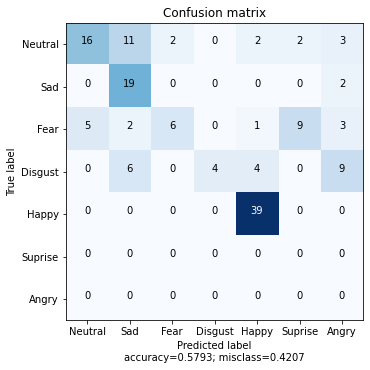

threshold: 0.05  Neutral data: 44.44%  Negative data: 41.43%  Positive data: 100.00%  Total data: 57.93%


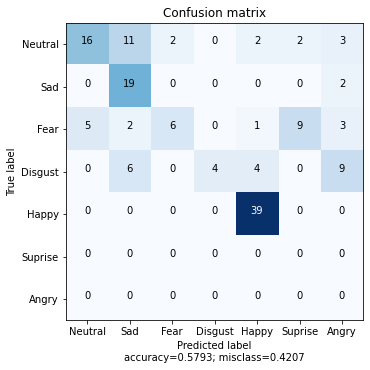

threshold: 0.1  Neutral data: 52.78%  Negative data: 38.57%  Positive data: 100.00%  Total data: 58.62%


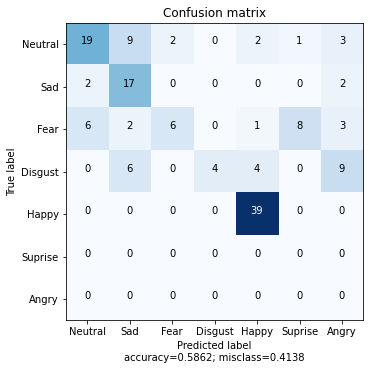

threshold: 0.15  Neutral data: 58.33%  Negative data: 37.14%  Positive data: 100.00%  Total data: 59.31%


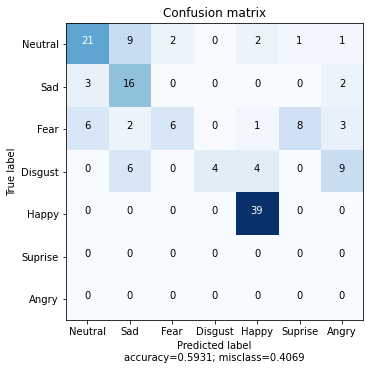

threshold: 0.2  Neutral data: 63.89%  Negative data: 37.14%  Positive data: 100.00%  Total data: 60.69%


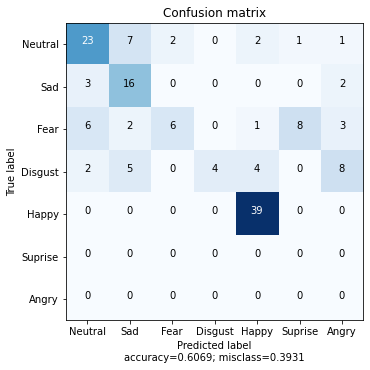

threshold: 0.25  Neutral data: 63.89%  Negative data: 37.14%  Positive data: 100.00%  Total data: 60.69%


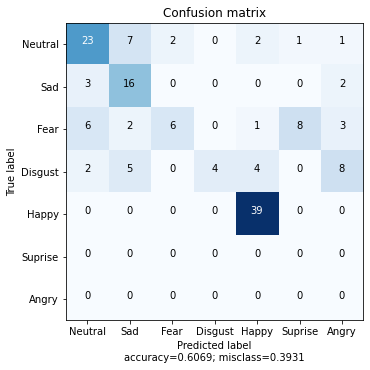

threshold: 0.3  Neutral data: 63.89%  Negative data: 37.14%  Positive data: 97.44%  Total data: 60.00%


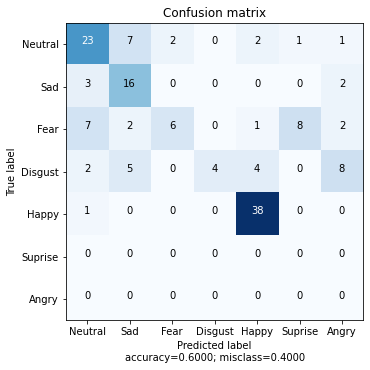

threshold: 0.35  Neutral data: 69.44%  Negative data: 35.71%  Positive data: 97.44%  Total data: 60.69%


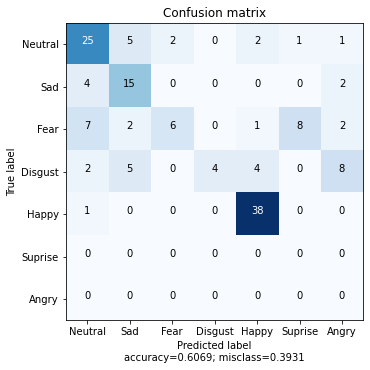

threshold: 0.4  Neutral data: 69.44%  Negative data: 32.86%  Positive data: 97.44%  Total data: 59.31%


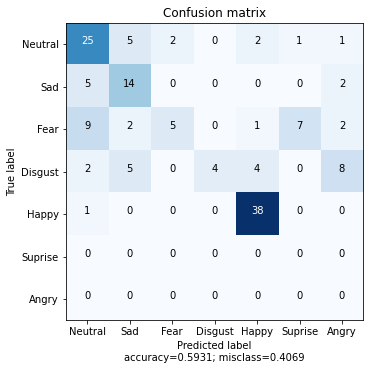

threshold: 0.45  Neutral data: 69.44%  Negative data: 32.86%  Positive data: 97.44%  Total data: 59.31%


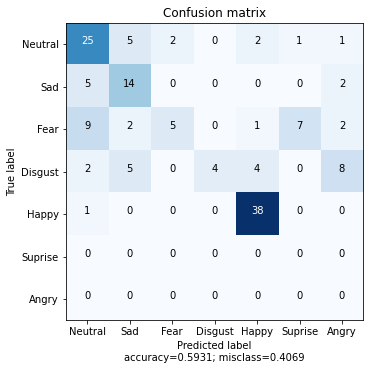

threshold: 0.5  Neutral data: 72.22%  Negative data: 32.86%  Positive data: 97.44%  Total data: 60.00%


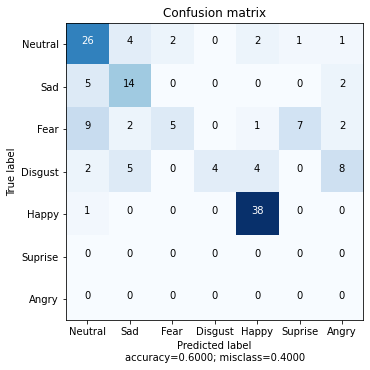

threshold: 0.55  Neutral data: 72.22%  Negative data: 32.86%  Positive data: 97.44%  Total data: 60.00%


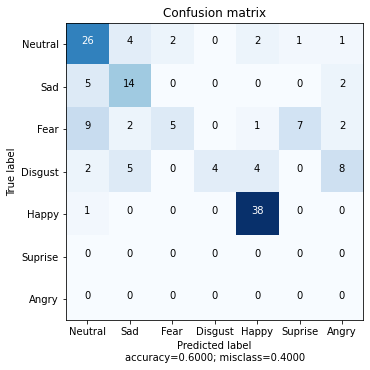

threshold: 0.6  Neutral data: 72.22%  Negative data: 32.86%  Positive data: 94.87%  Total data: 59.31%


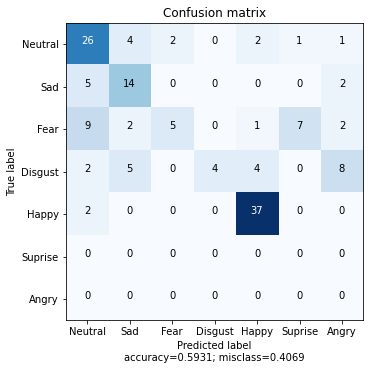

threshold: 0.65  Neutral data: 72.22%  Negative data: 32.86%  Positive data: 94.87%  Total data: 59.31%


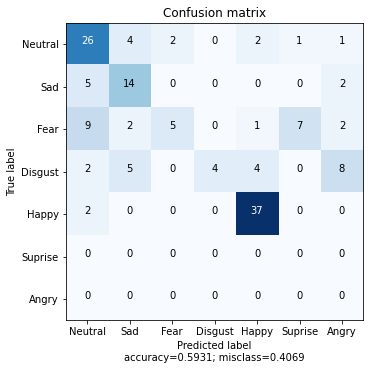

threshold: 0.7  Neutral data: 72.22%  Negative data: 32.86%  Positive data: 94.87%  Total data: 59.31%


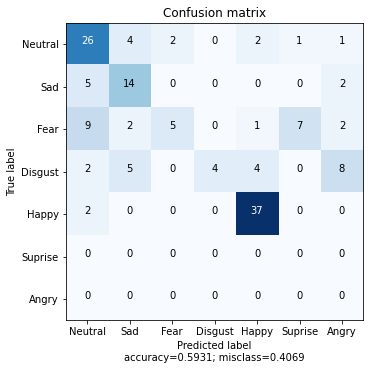

threshold: 0.75  Neutral data: 72.22%  Negative data: 32.86%  Positive data: 94.87%  Total data: 59.31%


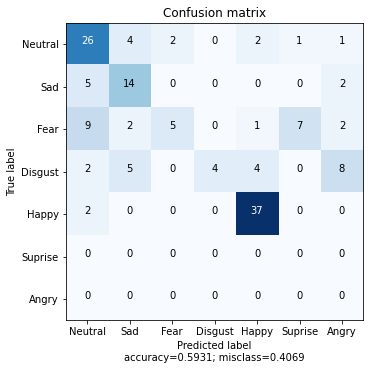

threshold: 0.8  Neutral data: 72.22%  Negative data: 32.86%  Positive data: 94.87%  Total data: 59.31%


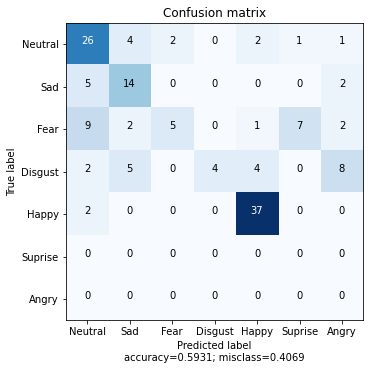

threshold: 0.85  Neutral data: 72.22%  Negative data: 32.86%  Positive data: 94.87%  Total data: 59.31%


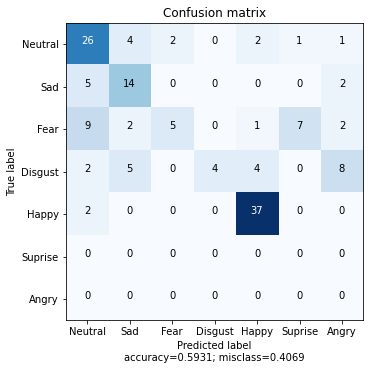

threshold: 0.9  Neutral data: 72.22%  Negative data: 32.86%  Positive data: 94.87%  Total data: 59.31%


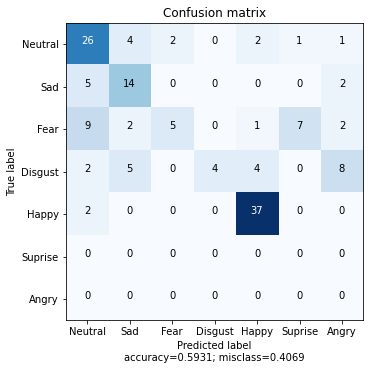

threshold: 0.95  Neutral data: 72.22%  Negative data: 32.86%  Positive data: 94.87%  Total data: 59.31%


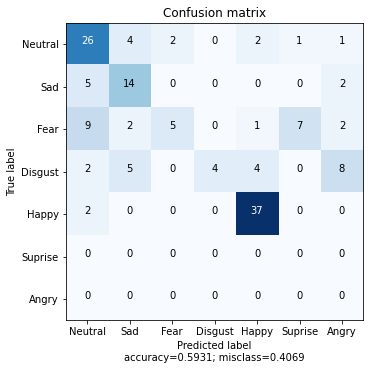

In [25]:
result=[]
for thre in range(0, 100, 5):
    threshold = thre / 100
    n_total = 0
    n_correct = 0
    h_total = 0
    h_correct = 0
    e_total = 0
    e_correct = 0
    # threshold = 0.275
    bad_data = []
    cf_matrix = np.array([[0,0,0,0,0,0,0],
                        [0,0,0,0,0,0,0],
                        [0,0,0,0,0,0,0],
                        [0,0,0,0,0,0,0],
                        [0,0,0,0,0,0,0],
                        [0,0,0,0,0,0,0],
                        [0,0,0,0,0,0,0]])
    #           Neutral , Negative , Positive
    # Neutral   [0][0]     [0][1]     [0][2]
    # Negative  [1][0]     [1][1]     [1][2]
    # Positive  [2][0]     [2][1]     [2][2]
    #           Neutral ,   Sad,       Fear,     Disgust,   Happy,    Suprise,    Angry
    # Neutral   [0][0]     [0][1]     [0][2]     [0][3]     [0][4]     [0][5]     [0][5]
    # Sad       [1][0]     [1][1]     [1][2]     [1][3]     [1][4]     [1][5]     [1][5]
    # Fear      [2][0]     [2][1]     [2][2]     [2][3]     [2][4]     [2][5]     [2][5]
    # Disgust   [3][0]     [3][1]     [3][2]     [3][3]     [3][4]     [3][5]     [3][5]
    # Happy     [4][0]     [4][1]     [4][2]     [4][3]     [4][4]     [4][5]     [4][5]
    # Suprise   [5][0]     [5][1]     [5][2]     [5][3]     [5][4]     [5][5]     [5][5]
    # Angry     [5][0]     [5][1]     [5][2]     [5][3]     [5][4]     [5][5]     [5][5]
    for i in range(len(label2)):
        file = label2['video'][i]
        df = pd.read_csv('/home/heemin/mv/dir/DuckEEs_crop/'+file+'.csv', index_col=0)
        label = label2.loc[label2['video'] == file]['mode'][i]

        if label2['Neutral'][i] == 2:
            l1 = df['total_count'].tolist()
            l2 = df['emotion'].tolist()
            df1 = pd.DataFrame([l1,l2]).T
            df1['index'] = df1[0]
            a = list(range(l1[-1]+1))
            index_df = pd.DataFrame(a, columns=['index'])
            df2 = pd.merge(index_df, df1, how="outer")
            df2 = df2.fillna('Neutral')
            emolist = df2[1].to_list()
            emocount = Counter(emolist)
            top3 = emocount.most_common(n=3)
            l3 = []


            total_len = len(df2)
            p10_len = int(total_len * threshold)

            if top3[0][0] == 'none':
                if len(top3) == 1:
                    l3.append('Neutral')
                elif top3[1][0] == 'Neutral':
                    if len(top3) == 3:
                        if top3[2][1] >= p10_len:
                            l3.append(top3[2][0])
                        else:
                            l3.append(top3[1][0])
                    else:
                        l3.append(top3[1][0])
            elif top3[0][0] == 'Neutral':
                if len(top3) == 1:
                    l3.append('Neutral')
                elif top3[1][0] == 'none':
                    if len(top3) == 2: 
                        l3.append('Neutral')
                    else:
                        if top3[2][1] >= p10_len:
                            l3.append(top3[2][0])
                        else:
                            l3.append(top3[0][0])
                else:
                    if top3[1][1] >= p10_len:
                        l3.append(top3[1][0])
                    else:
                        l3.append(top3[0][0])
            else:
                l3.append(top3[0][0])
            for emotion in l3:
                h_total+=1
                if emotion_dict[emotion] == duckEE_dict[label]:
                    h_correct += 1
                    cf_matrix[4][4] += 1
                else:
                    if emotion_dict[emotion] == 'Neutral':
                        cf_matrix[4][0] += 1
                    elif emotion_dict[emotion] == 'Sad':
                        cf_matrix[4][1] += 1
                    elif emotion_dict[emotion] == 'Fear':
                        cf_matrix[4][2] += 1
                    elif emotion_dict[emotion] == 'Disgust':
                        cf_matrix[4][3] += 1
                    elif emotion_dict[emotion] == 'Suprise':
                        cf_matrix[4][5] += 1
                    elif emotion_dict[emotion] == 'Angry':
                        cf_matrix[4][6] += 1
                    bad_data.append([file, emotion, label])
                # print(file, emotion, label, emotion_dict[emotion], duckEE_dict[label])

        elif label2['Neutral'][i] == 0:
            l1 = df['total_count'].tolist()
            l2 = df['emotion'].tolist()
            df1 = pd.DataFrame([l1,l2]).T
            df1['index'] = df1[0]
            a = list(range(l1[-1]+1))
            index_df = pd.DataFrame(a, columns=['index'])
            df2 = pd.merge(index_df, df1, how="outer")
            df2 = df2.fillna('Neutral')
            emolist = df2[1].to_list()
            emocount = Counter(emolist)
            top3 = emocount.most_common(n=3)
            l3 = []


            total_len = len(df2)
            p10_len = int(total_len * threshold)
            # print(file, total_len, threshold, p10_len, top3)

            if top3[0][0] == 'none':
                if len(top3) == 1:
                    l3.append('Neutral')
                elif top3[1][0] == 'Neutral':
                    if len(top3) == 3:
                        if top3[2][1] >= p10_len:
                            l3.append(top3[2][0])
                        else:
                            l3.append(top3[1][0])
                    else:
                        l3.append(top3[1][0])
            elif top3[0][0] == 'Neutral':
                if len(top3) == 1:
                    l3.append('Neutral')
                elif top3[1][0] == 'none':
                    if len(top3) == 2: 
                        l3.append('Neutral')
                    else:
                        if top3[2][1] >= p10_len:
                            l3.append(top3[2][0])
                        else:
                            l3.append(top3[0][0])
                else:
                    if top3[1][1] >= p10_len:
                        l3.append(top3[1][0])
                    else:
                        l3.append(top3[0][0])
            else:
                l3.append(top3[0][0])
            for emotion in l3:
                n_total+=1
                if emotion_dict[emotion] == duckEE_dict[label]:
                    n_correct += 1
                    cf_matrix[0][0] += 1
                else:
                    if emotion_dict[emotion] == 'Sad':
                        cf_matrix[0][1] += 1
                    elif emotion_dict[emotion] == 'Fear':
                        cf_matrix[0][2] += 1
                    elif emotion_dict[emotion] == 'Disgust':
                        cf_matrix[0][3] += 1
                    elif emotion_dict[emotion] == 'Happy':
                        cf_matrix[0][4] += 1
                    elif emotion_dict[emotion] == 'Suprise':
                        cf_matrix[0][5] += 1
                    elif emotion_dict[emotion] == 'Angry':
                        cf_matrix[0][6] += 1
                    bad_data.append([file, emotion, label])
                # print(file, emotion, label, emotion_dict[emotion], duckEE_dict[label])
        
        elif label2['Neutral'][i] == 1:
            l1 = df['total_count'].tolist()
            l2 = df['emotion'].tolist()
            df1 = pd.DataFrame([l1,l2]).T
            df1['index'] = df1[0]
            a = list(range(l1[-1]+1))
            index_df = pd.DataFrame(a, columns=['index'])
            df2 = pd.merge(index_df, df1, how="outer")
            df2 = df2.fillna('Neutral')
            emolist = df2[1].to_list()
            emocount = Counter(emolist)
            top3 = emocount.most_common(n=3)
            l3 = []
            # print(label2['mode'][i])

            total_len = len(df2)
            p10_len = int(total_len * threshold)

            if top3[0][0] == 'none':
                if len(top3) == 1:
                    l3.append('Neutral')
                elif top3[1][0] == 'Neutral':
                    if len(top3) == 3:
                        if top3[2][1] >= p10_len:
                            l3.append(top3[2][0])
                        else:
                            l3.append(top3[1][0])
                    else:
                        l3.append(top3[1][0])
            elif top3[0][0] == 'Neutral':
                if len(top3) == 1:
                    l3.append('Neutral')
                elif top3[1][0] == 'none':
                    if len(top3) == 2: 
                        l3.append('Neutral')
                    else:
                        if top3[2][1] >= p10_len:
                            l3.append(top3[2][0])
                        else:
                            l3.append(top3[0][0])
                else:
                    if top3[1][1] >= p10_len:
                        l3.append(top3[1][0])
                    else:
                        l3.append(top3[0][0])
            else:
                l3.append(top3[0][0])
            for emotion in l3:
                e_total+=1
                if label2['mode'][i] == 'sadness':
                    if emotion_dict[emotion] == duckEE_dict[label]:
                        e_correct += 1
                        cf_matrix[1][1] += 1
                    else:
                        if emotion_dict[emotion] == 'Neutral':
                            cf_matrix[1][0] += 1
                        elif emotion_dict[emotion] == 'Fear':
                            cf_matrix[1][2] += 1
                        elif emotion_dict[emotion] == 'Disgust':
                            cf_matrix[1][3] += 1
                        elif emotion_dict[emotion] == 'Happy':
                            cf_matrix[1][4] += 1
                        elif emotion_dict[emotion] == 'Suprise':
                            cf_matrix[1][5] += 1
                        elif emotion_dict[emotion] == 'Angry':
                            cf_matrix[1][6] += 1
                        bad_data.append([file, emotion, label])
                    # print(file, emotion, label, emotion_dict[emotion], duckEE_dict[label])
                elif label2['mode'][i] == 'fear':
                    if emotion_dict[emotion] == duckEE_dict[label]:
                        e_correct += 1
                        cf_matrix[2][2] += 1
                    else:
                        if emotion_dict[emotion] == 'Neutral':
                            cf_matrix[2][0] += 1
                        elif emotion_dict[emotion] == 'Sad':
                            cf_matrix[2][1] += 1
                        elif emotion_dict[emotion] == 'Disgust':
                            cf_matrix[2][3] += 1
                        elif emotion_dict[emotion] == 'Happy':
                            cf_matrix[2][4] += 1
                        elif emotion_dict[emotion] == 'Suprise':
                            cf_matrix[2][5] += 1
                        elif emotion_dict[emotion] == 'Angry':
                            cf_matrix[2][6] += 1
                        bad_data.append([file, emotion, label])
                    # print(file, emotion, label, emotion_dict[emotion], duckEE_dict[label])
                elif label2['mode'][i] == 'disgust':
                    if emotion_dict[emotion] == duckEE_dict[label]:
                        e_correct += 1
                        cf_matrix[3][3] += 1
                    else:
                        if emotion_dict[emotion] == 'Neutral':
                            cf_matrix[3][0] += 1
                        elif emotion_dict[emotion] == 'Sad':
                            cf_matrix[3][1] += 1
                        elif emotion_dict[emotion] == 'Fear':
                            cf_matrix[3][2] += 1
                        elif emotion_dict[emotion] == 'Happy':
                            cf_matrix[3][4] += 1
                        elif emotion_dict[emotion] == 'Suprise':
                            cf_matrix[3][5] += 1
                        elif emotion_dict[emotion] == 'Angry':
                            cf_matrix[3][6] += 1
                        bad_data.append([file, emotion, label])
                    # print(file, emotion, label, emotion_dict[emotion], duckEE_dict[label])
        
    n_acc = n_correct / n_total
    h_acc = h_correct / h_total
    e_acc = e_correct / e_total
    acc = (n_correct+h_correct+e_correct) / (n_total+h_total+e_total)
    print(f'threshold: {threshold}  Neutral data: {n_acc*100:0.2f}%  Negative data: {e_acc*100:0.2f}%  Positive data: {h_acc*100:0.2f}%  Total data: {acc*100:0.2f}%')
    plot_confusion_matrix(cf_matrix, target_names=['Neutral', 'Sad', 'Fear', 'Disgust', 'Happy', 'Suprise', 'Angry'], normalize=False)
    result.append([threshold, acc, n_acc, e_acc, h_acc])

threshold: 0.0  Neutral data: 44.44%  Negative data: 41.43%  Positive data: 100.00%  Total data: 57.93%


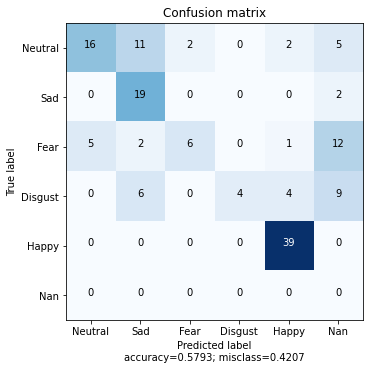

threshold: 0.05  Neutral data: 44.44%  Negative data: 41.43%  Positive data: 100.00%  Total data: 57.93%


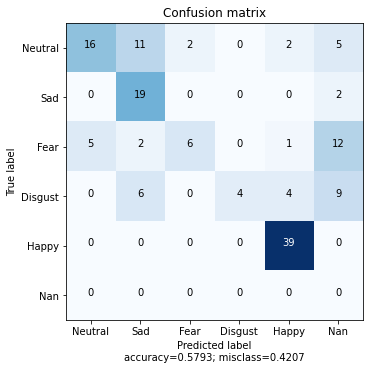

threshold: 0.1  Neutral data: 52.78%  Negative data: 38.57%  Positive data: 100.00%  Total data: 58.62%


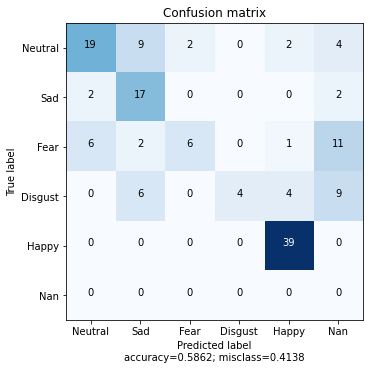

threshold: 0.15  Neutral data: 58.33%  Negative data: 37.14%  Positive data: 100.00%  Total data: 59.31%


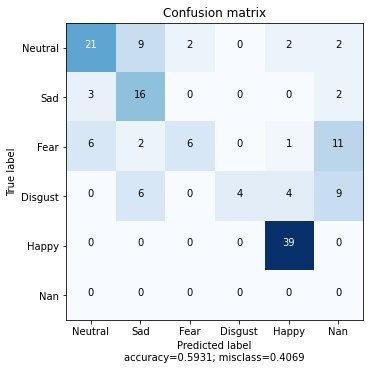

threshold: 0.2  Neutral data: 63.89%  Negative data: 37.14%  Positive data: 100.00%  Total data: 60.69%


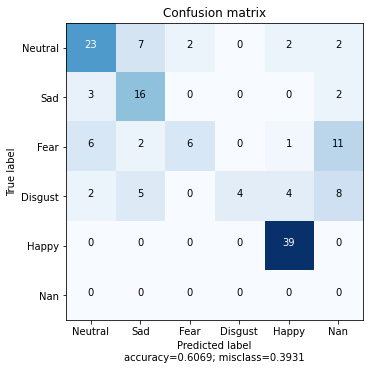

threshold: 0.25  Neutral data: 63.89%  Negative data: 37.14%  Positive data: 100.00%  Total data: 60.69%


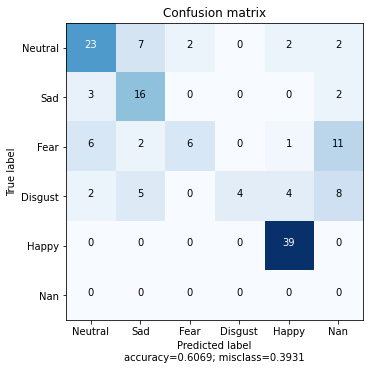

threshold: 0.3  Neutral data: 63.89%  Negative data: 37.14%  Positive data: 97.44%  Total data: 60.00%


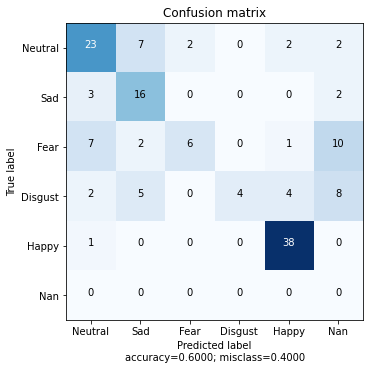

threshold: 0.35  Neutral data: 69.44%  Negative data: 35.71%  Positive data: 97.44%  Total data: 60.69%


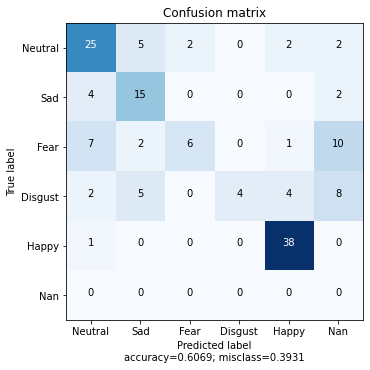

threshold: 0.4  Neutral data: 69.44%  Negative data: 32.86%  Positive data: 97.44%  Total data: 59.31%


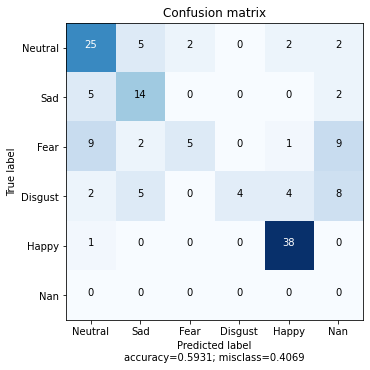

threshold: 0.45  Neutral data: 69.44%  Negative data: 32.86%  Positive data: 97.44%  Total data: 59.31%


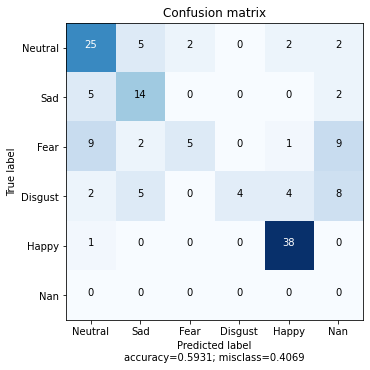

threshold: 0.5  Neutral data: 72.22%  Negative data: 32.86%  Positive data: 97.44%  Total data: 60.00%


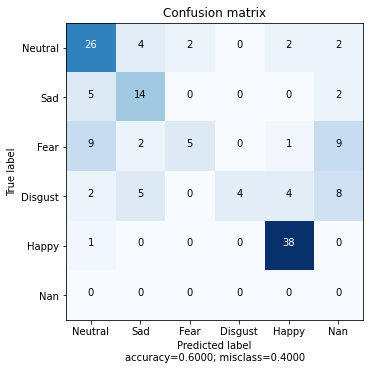

threshold: 0.55  Neutral data: 72.22%  Negative data: 32.86%  Positive data: 97.44%  Total data: 60.00%


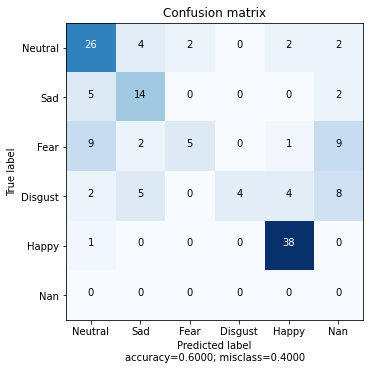

threshold: 0.6  Neutral data: 72.22%  Negative data: 32.86%  Positive data: 94.87%  Total data: 59.31%


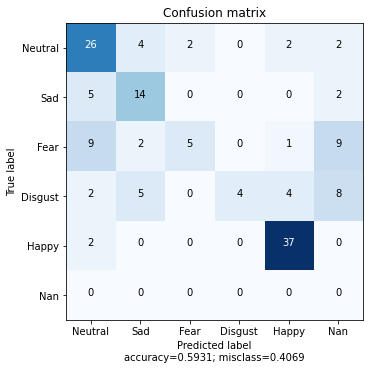

threshold: 0.65  Neutral data: 72.22%  Negative data: 32.86%  Positive data: 94.87%  Total data: 59.31%


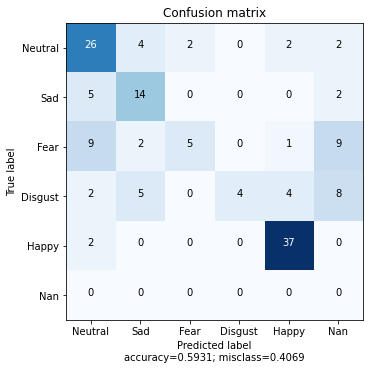

threshold: 0.7  Neutral data: 72.22%  Negative data: 32.86%  Positive data: 94.87%  Total data: 59.31%


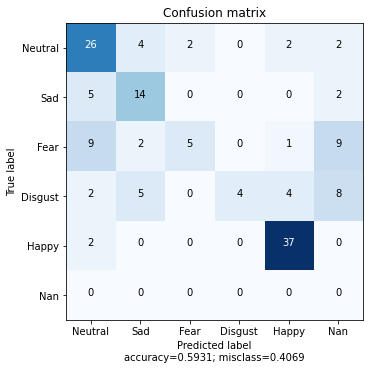

threshold: 0.75  Neutral data: 72.22%  Negative data: 32.86%  Positive data: 94.87%  Total data: 59.31%


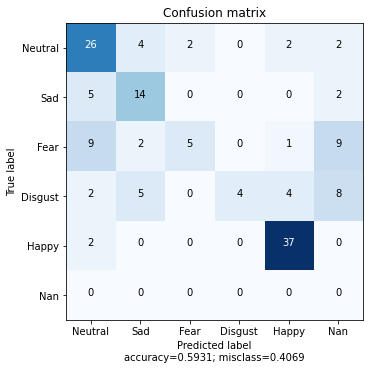

threshold: 0.8  Neutral data: 72.22%  Negative data: 32.86%  Positive data: 94.87%  Total data: 59.31%


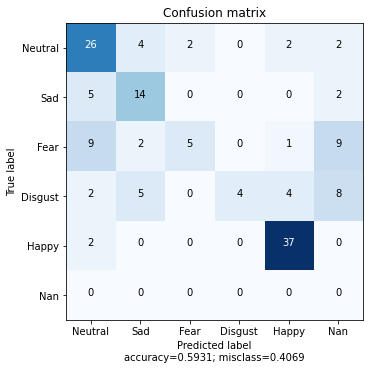

threshold: 0.85  Neutral data: 72.22%  Negative data: 32.86%  Positive data: 94.87%  Total data: 59.31%


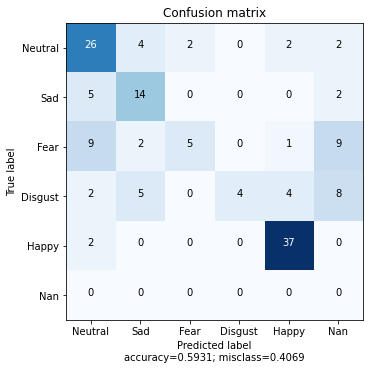

threshold: 0.9  Neutral data: 72.22%  Negative data: 32.86%  Positive data: 94.87%  Total data: 59.31%


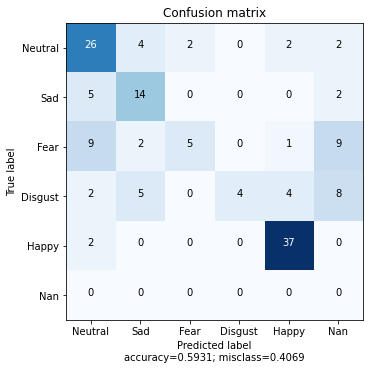

threshold: 0.95  Neutral data: 72.22%  Negative data: 32.86%  Positive data: 94.87%  Total data: 59.31%


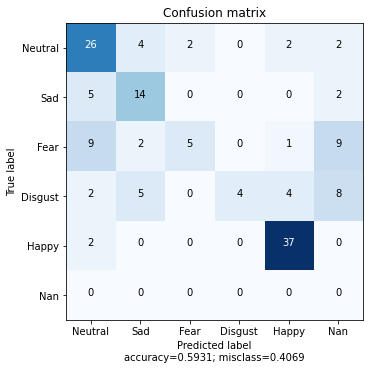

In [57]:
result=[]
for thre in range(0, 100, 5):
    threshold = thre / 100
    n_total = 0
    n_correct = 0
    h_total = 0
    h_correct = 0
    e_total = 0
    e_correct = 0
    # threshold = 0.275
    bad_data = []
    cf_matrix = np.array([[0,0,0,0,0,0],
                        [0,0,0,0,0,0],
                        [0,0,0,0,0,0],
                        [0,0,0,0,0,0],
                        [0,0,0,0,0,0],
                        [0,0,0,0,0,0]])
    #           Neutral , Negative , Positive
    # Neutral   [0][0]     [0][1]     [0][2]
    # Negative  [1][0]     [1][1]     [1][2]
    # Positive  [2][0]     [2][1]     [2][2]
    #           Neutral ,   Sad,       Fear,     Disgust,   Happy,    Suprise,    Angry
    # Neutral   [0][0]     [0][1]     [0][2]     [0][3]     [0][4]     [0][5]     [0][5]
    # Sad       [1][0]     [1][1]     [1][2]     [1][3]     [1][4]     [1][5]     [1][5]
    # Fear      [2][0]     [2][1]     [2][2]     [2][3]     [2][4]     [2][5]     [2][5]
    # Disgust   [3][0]     [3][1]     [3][2]     [3][3]     [3][4]     [3][5]     [3][5]
    # Happy     [4][0]     [4][1]     [4][2]     [4][3]     [4][4]     [4][5]     [4][5]
    # Suprise   [5][0]     [5][1]     [5][2]     [5][3]     [5][4]     [5][5]     [5][5]
    # Angry     [5][0]     [5][1]     [5][2]     [5][3]     [5][4]     [5][5]     [5][5]
    for i in range(len(label2)):
        file = label2['video'][i]
        df = pd.read_csv('/home/heemin/mv/dir/DuckEEs_crop/'+file+'.csv', index_col=0)
        label = label2.loc[label2['video'] == file]['mode'][i]

        if label2['Neutral'][i] == 2:
            l1 = df['total_count'].tolist()
            l2 = df['emotion'].tolist()
            df1 = pd.DataFrame([l1,l2]).T
            df1['index'] = df1[0]
            a = list(range(l1[-1]+1))
            index_df = pd.DataFrame(a, columns=['index'])
            df2 = pd.merge(index_df, df1, how="outer")
            df2 = df2.fillna('Neutral')
            emolist = df2[1].to_list()
            emocount = Counter(emolist)
            top3 = emocount.most_common(n=3)
            l3 = []


            total_len = len(df2)
            p10_len = int(total_len * threshold)

            if top3[0][0] == 'none':
                if len(top3) == 1:
                    l3.append('Neutral')
                elif top3[1][0] == 'Neutral':
                    if len(top3) == 3:
                        if top3[2][1] >= p10_len:
                            l3.append(top3[2][0])
                        else:
                            l3.append(top3[1][0])
                    else:
                        l3.append(top3[1][0])
            elif top3[0][0] == 'Neutral':
                if len(top3) == 1:
                    l3.append('Neutral')
                elif top3[1][0] == 'none':
                    if len(top3) == 2: 
                        l3.append('Neutral')
                    else:
                        if top3[2][1] >= p10_len:
                            l3.append(top3[2][0])
                        else:
                            l3.append(top3[0][0])
                else:
                    if top3[1][1] >= p10_len:
                        l3.append(top3[1][0])
                    else:
                        l3.append(top3[0][0])
            else:
                l3.append(top3[0][0])
            for emotion in l3:
                h_total+=1
                if emotion_dict[emotion] == duckEE_dict[label]:
                    h_correct += 1
                    cf_matrix[4][4] += 1
                else:
                    if emotion_dict[emotion] == 'Neutral':
                        cf_matrix[4][0] += 1
                    elif emotion_dict[emotion] == 'Sad':
                        cf_matrix[4][1] += 1
                    elif emotion_dict[emotion] == 'Fear':
                        cf_matrix[4][2] += 1
                    elif emotion_dict[emotion] == 'Disgust':
                        cf_matrix[4][3] += 1
                    elif emotion_dict[emotion] == 'Suprise':
                        cf_matrix[4][5] += 1
                    elif emotion_dict[emotion] == 'Angry':
                        cf_matrix[4][5] += 1
                    bad_data.append([file, emotion, label])
                # print(file, emotion, label, emotion_dict[emotion], duckEE_dict[label])

        elif label2['Neutral'][i] == 0:
            l1 = df['total_count'].tolist()
            l2 = df['emotion'].tolist()
            df1 = pd.DataFrame([l1,l2]).T
            df1['index'] = df1[0]
            a = list(range(l1[-1]+1))
            index_df = pd.DataFrame(a, columns=['index'])
            df2 = pd.merge(index_df, df1, how="outer")
            df2 = df2.fillna('Neutral')
            emolist = df2[1].to_list()
            emocount = Counter(emolist)
            top3 = emocount.most_common(n=3)
            l3 = []


            total_len = len(df2)
            p10_len = int(total_len * threshold)
            # print(file, total_len, threshold, p10_len, top3)

            if top3[0][0] == 'none':
                if len(top3) == 1:
                    l3.append('Neutral')
                elif top3[1][0] == 'Neutral':
                    if len(top3) == 3:
                        if top3[2][1] >= p10_len:
                            l3.append(top3[2][0])
                        else:
                            l3.append(top3[1][0])
                    else:
                        l3.append(top3[1][0])
            elif top3[0][0] == 'Neutral':
                if len(top3) == 1:
                    l3.append('Neutral')
                elif top3[1][0] == 'none':
                    if len(top3) == 2: 
                        l3.append('Neutral')
                    else:
                        if top3[2][1] >= p10_len:
                            l3.append(top3[2][0])
                        else:
                            l3.append(top3[0][0])
                else:
                    if top3[1][1] >= p10_len:
                        l3.append(top3[1][0])
                    else:
                        l3.append(top3[0][0])
            else:
                l3.append(top3[0][0])
            for emotion in l3:
                n_total+=1
                if emotion_dict[emotion] == duckEE_dict[label]:
                    n_correct += 1
                    cf_matrix[0][0] += 1
                else:
                    if emotion_dict[emotion] == 'Sad':
                        cf_matrix[0][1] += 1
                    elif emotion_dict[emotion] == 'Fear':
                        cf_matrix[0][2] += 1
                    elif emotion_dict[emotion] == 'Disgust':
                        cf_matrix[0][3] += 1
                    elif emotion_dict[emotion] == 'Happy':
                        cf_matrix[0][4] += 1
                    elif emotion_dict[emotion] == 'Suprise':
                        cf_matrix[0][5] += 1
                    elif emotion_dict[emotion] == 'Angry':
                        cf_matrix[0][5] += 1
                    bad_data.append([file, emotion, label])
                # print(file, emotion, label, emotion_dict[emotion], duckEE_dict[label])
        
        elif label2['Neutral'][i] == 1:
            l1 = df['total_count'].tolist()
            l2 = df['emotion'].tolist()
            df1 = pd.DataFrame([l1,l2]).T
            df1['index'] = df1[0]
            a = list(range(l1[-1]+1))
            index_df = pd.DataFrame(a, columns=['index'])
            df2 = pd.merge(index_df, df1, how="outer")
            df2 = df2.fillna('Neutral')
            emolist = df2[1].to_list()
            emocount = Counter(emolist)
            top3 = emocount.most_common(n=3)
            l3 = []
            # print(label2['mode'][i])

            total_len = len(df2)
            p10_len = int(total_len * threshold)

            if top3[0][0] == 'none':
                if len(top3) == 1:
                    l3.append('Neutral')
                elif top3[1][0] == 'Neutral':
                    if len(top3) == 3:
                        if top3[2][1] >= p10_len:
                            l3.append(top3[2][0])
                        else:
                            l3.append(top3[1][0])
                    else:
                        l3.append(top3[1][0])
            elif top3[0][0] == 'Neutral':
                if len(top3) == 1:
                    l3.append('Neutral')
                elif top3[1][0] == 'none':
                    if len(top3) == 2: 
                        l3.append('Neutral')
                    else:
                        if top3[2][1] >= p10_len:
                            l3.append(top3[2][0])
                        else:
                            l3.append(top3[0][0])
                else:
                    if top3[1][1] >= p10_len:
                        l3.append(top3[1][0])
                    else:
                        l3.append(top3[0][0])
            else:
                l3.append(top3[0][0])
            for emotion in l3:
                e_total+=1
                if label2['mode'][i] == 'sadness':
                    if emotion_dict[emotion] == duckEE_dict[label]:
                        e_correct += 1
                        cf_matrix[1][1] += 1
                    else:
                        if emotion_dict[emotion] == 'Neutral':
                            cf_matrix[1][0] += 1
                        elif emotion_dict[emotion] == 'Fear':
                            cf_matrix[1][2] += 1
                        elif emotion_dict[emotion] == 'Disgust':
                            cf_matrix[1][3] += 1
                        elif emotion_dict[emotion] == 'Happy':
                            cf_matrix[1][4] += 1
                        elif emotion_dict[emotion] == 'Suprise':
                            cf_matrix[1][5] += 1
                        elif emotion_dict[emotion] == 'Angry':
                            cf_matrix[1][5] += 1
                        bad_data.append([file, emotion, label])
                    # print(file, emotion, label, emotion_dict[emotion], duckEE_dict[label])
                elif label2['mode'][i] == 'fear':
                    if emotion_dict[emotion] == duckEE_dict[label]:
                        e_correct += 1
                        cf_matrix[2][2] += 1
                    else:
                        if emotion_dict[emotion] == 'Neutral':
                            cf_matrix[2][0] += 1
                        elif emotion_dict[emotion] == 'Sad':
                            cf_matrix[2][1] += 1
                        elif emotion_dict[emotion] == 'Disgust':
                            cf_matrix[2][3] += 1
                        elif emotion_dict[emotion] == 'Happy':
                            cf_matrix[2][4] += 1
                        elif emotion_dict[emotion] == 'Suprise':
                            cf_matrix[2][5] += 1
                        elif emotion_dict[emotion] == 'Angry':
                            cf_matrix[2][5] += 1
                        bad_data.append([file, emotion, label])
                    # print(file, emotion, label, emotion_dict[emotion], duckEE_dict[label])
                elif label2['mode'][i] == 'disgust':
                    if emotion_dict[emotion] == duckEE_dict[label]:
                        e_correct += 1
                        cf_matrix[3][3] += 1
                    else:
                        if emotion_dict[emotion] == 'Neutral':
                            cf_matrix[3][0] += 1
                        elif emotion_dict[emotion] == 'Sad':
                            cf_matrix[3][1] += 1
                        elif emotion_dict[emotion] == 'Fear':
                            cf_matrix[3][2] += 1
                        elif emotion_dict[emotion] == 'Happy':
                            cf_matrix[3][4] += 1
                        elif emotion_dict[emotion] == 'Suprise':
                            cf_matrix[3][5] += 1
                        elif emotion_dict[emotion] == 'Angry':
                            cf_matrix[3][5] += 1
                        bad_data.append([file, emotion, label])
                    # print(file, emotion, label, emotion_dict[emotion], duckEE_dict[label])
        
    n_acc = n_correct / n_total
    h_acc = h_correct / h_total
    e_acc = e_correct / e_total
    acc = (n_correct+h_correct+e_correct) / (n_total+h_total+e_total)
    print(f'threshold: {threshold}  Neutral data: {n_acc*100:0.2f}%  Negative data: {e_acc*100:0.2f}%  Positive data: {h_acc*100:0.2f}%  Total data: {acc*100:0.2f}%')
    plot_confusion_matrix(cf_matrix, target_names=['Neutral', 'Sad', 'Fear', 'Disgust', 'Happy', 'Nan'], normalize=False)
    result.append([threshold, acc, n_acc, e_acc, h_acc])

In [43]:
label

'neutral'

In [41]:
emotion

'Suprise'

In [23]:
pd.DataFrame(result, columns=['Threshold', 'Accuracy', 'Neutral', 'Negative', 'Positive']).to_excel('/home/heemin/mv/dir/threshold.xlsx')

In [59]:
k = pd.DataFrame(bad_data, columns=['file', 'emotion', 'label'])

In [61]:
k.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   file     24 non-null     object
 1   emotion  24 non-null     object
 2   label    24 non-null     object
dtypes: object(3)
memory usage: 704.0+ bytes


In [62]:
j.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   file     31 non-null     object
 1   emotion  31 non-null     object
 2   label    31 non-null     object
dtypes: object(3)
memory usage: 872.0+ bytes


In [63]:
pd.merge(j, k, how='left', on='file')

,file,emotion_x,label_x,emotion_y,label_y
0,10n,Sad,neutral,NaN,NaN
1,11e,Happy,embarrassment,Happy,embarrassment
2,13e,Happy,embarrassment,Happy,embarrassment
3,15n,Suprise,neutral,NaN,NaN
4,16f,Neutral,fear,Neutral,fear
5,16p,Neutral,pride,Neutral,pride
6,18e,Neutral,embarrassment,Neutral,embarrassment
7,18n,Fear,neutral,NaN,NaN
8,18s,Sad,neutral,NaN,NaN
9,20n,Angry,neutral,NaN,NaN


In [23]:
bd = pd.DataFrame(bad_data, columns=['file', 'emotion', 'label'])
bd[bd['label']=='Positive'][['emotion', 'label']].groupby('emotion').count().sort_values(by='label', ascending=False).reset_index()

,emotion,label


In [ ]:
bd[bd['label']=='Negative'][['emotion', 'label']].groupby('emotion').count().sort_values(by='label', ascending=False).reset_index()

,emotion,label
0,Neutral,2
1,Happy,1


In [ ]:
bd[bd['label']=='Neutral'][['emotion', 'label']].groupby('emotion').count().sort_values(by='label', ascending=False).reset_index()

,emotion,label
0,Fear,2
1,Sad,2
2,Angry,1


In [ ]:
# bd[bd['label']=='Neutral'].to_excel('/Users/heemin/Documents/DHLab/mv/project/baddata_Neutral.xlsx')

In [74]:
n_total = 0
n_correct = 0
e_total = 0
e_correct = 0
theshold = 0.275
bad_data = []
for i in range(len(label2)):
    file = label2['video'][i]
    df = pd.read_csv('/home/heemin/mv/dir/DuckEEs_crop/'+file+'.csv', index_col=0)
    label = label2.loc[label2['video'] == file]['mode'][i]

    if label2['Neutral'][i] == 0:
        l1 = df['total_count'].tolist()
        l2 = df['emotion'].tolist()
        df1 = pd.DataFrame([l1,l2]).T
        df1['index'] = df1[0]
        a = list(range(1, l1[-1]+1))
        index_df = pd.DataFrame(a, columns=['index'])
        df2 = pd.merge(index_df, df1, how="outer")
        df2 = df2.fillna('none')
        emolist = df2[1].to_list()
        emocount = Counter(emolist)
        top3 = emocount.most_common(n=3)
        l3 = []
        
        if top3[0][0] == 'none':
            l3.append('Neutral')
        else:
            l3.append(top3[0][0])
        for emotion in l3:
            e_total+=1
            if emotion_dict[emotion] == duckEE_dict[label]:
                e_correct += 1
            else:
                bad_data.append([file, emotion, label])
            print(file, emotion, label, emotion_dict[emotion], duckEE_dict[label])
    
    else:
        l1 = df['total_count'].tolist()
        l2 = df['emotion'].tolist()
        df1 = pd.DataFrame([l1,l2]).T
        df1['index'] = df1[0]
        a = list(range(1, l1[-1]+1))
        index_df = pd.DataFrame(a, columns=['index'])
        df2 = pd.merge(index_df, df1, how="outer")
        df2 = df2.fillna('none')
        emolist = df2[1].to_list()
        emocount = Counter(emolist)
        top3 = emocount.most_common(n=3)
        l3 = []
        
        if top3[0][0] == 'none':
            l3.append('Neutral')
        else:
            l3.append(top3[0][0])

        for emotion in l3:
            n_total+=1
            if emotion_dict[emotion] == duckEE_dict[label]:
                n_correct += 1
            else:
                bad_data.append([file, emotion, label])
            print(file, emotion, label, emotion_dict[emotion], duckEE_dict[label])
    
n_acc = n_correct / n_total
e_acc = e_correct / e_total
acc = (n_correct+e_correct) / (n_total+e_total)
print(f'Accuracy for Neutral data: {n_acc*100:0.2f}%\nAccuracy for Non-Neutral data: {e_acc*100:0.2f}%\nAccuracy for Total data: {acc*100:0.2f}%\n')

10d Sad sadness Negative Negative
10f Neutral fear Neutral Negative
10h Happy happiness Positive Positive
10n Sad neutral Negative Neutral
10p Happy pride Positive Positive
10s Sad sadness Negative Negative
11e Happy embarrassment Positive Negative
11f Suprise fear Negative Negative
11h Happy happiness Positive Positive
11n Neutral neutral Neutral Neutral
11p Happy pride Positive Positive
11s Neutral sadness Neutral Negative
12f Angry fear Negative Negative
12h Happy happiness Positive Positive
12n Neutral neutral Neutral Neutral
13d Sad disgust Negative Negative
13e Happy embarrassment Positive Negative
13f Sad fear Negative Negative
13h Happy happiness Positive Positive
13p Happy pride Positive Positive
14d Disgust disgust Negative Negative
14h Neutral happiness Neutral Positive
15n Suprise neutral Negative Neutral
16e Sad embarrassment Negative Negative
16f Neutral fear Neutral Negative
16h Happy happiness Positive Positive
16n Neutral neutral Neutral Neutral
16p Neutral pride Neutr